In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset=pd.read_csv("Algerian_forest_fires_dataset_UPDATE (1).csv",header=1)

In [9]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [16]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
dataset.loc[:122,"region"]=0
dataset.loc[122:,"region"]=1
df=dataset

In [19]:
df[["region"]]=df[["region"]].astype(int)

In [20]:
df.columns=df.columns.str.strip()

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [22]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df.info()

In [23]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  region  

In [24]:
df=df.drop(122).reset_index(drop=True)
df=df.drop(164).reset_index(drop=True)

In [25]:
df[[ 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']]=df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']].astype(float)

In [26]:
df[['Temperature', 'RH', 'Ws']]=df[['Temperature', 'RH', 'Ws']].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    object 
 1   month        242 non-null    object 
 2   year         242 non-null    object 
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 28.5+ KB


In [28]:
df.to_csv('Algerian_forest_fires_dataset_UPDATE_fresh.csv',index=False)

In [29]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [30]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,09,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,27,09,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [31]:
df.corr()

/tmp/ipykernel_106/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.648982,-0.280095,-0.328295,0.677949,0.491545,0.386094,0.609435,0.466597,0.573499,0.513768,0.264215
RH,-0.648982,1.000000,0.240872,0.222582,-0.644548,-0.411011,-0.231804,-0.689205,-0.356883,-0.584175,-0.429840,-0.399832
Ws,-0.280095,0.240872,1.000000,0.171489,-0.165021,-0.001728,0.076351,0.008065,0.030000,0.031270,-0.066949,-0.178133
Rain,-0.328295,0.222582,0.171489,1.000000,-0.544037,-0.288914,-0.298719,-0.347545,-0.300096,-0.324598,-0.379413,-0.039758
FFMC,0.677949,-0.644548,-0.165021,-0.544037,1.000000,0.604611,0.510127,0.740715,0.593404,0.692319,0.769275,0.220689
DMC,0.491545,-0.411011,-0.001728,-0.288914,0.604611,1.000000,0.876353,0.680436,0.982277,0.875823,0.587682,0.193657
DC,0.386094,-0.231804,0.076351,-0.298719,0.510127,0.876353,1.000000,0.508926,0.942241,0.739635,0.515647,-0.075592
ISI,0.609435,-0.689205,0.008065,-0.347545,0.740715,0.680436,0.508926,1.000000,0.644116,0.922946,0.736878,0.264300
BUI,0.466597,-0.356883,0.030000,-0.300096,0.593404,0.982277,0.942241,0.644116,1.000000,0.857913,0.589267,0.091322
FWI,0.573499,-0.584175,0.031270,-0.324598,0.692319,0.875823,0.739635,0.922946,0.857913,1.000000,0.721661,0.198863


/tmp/ipykernel_106/1203768356.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


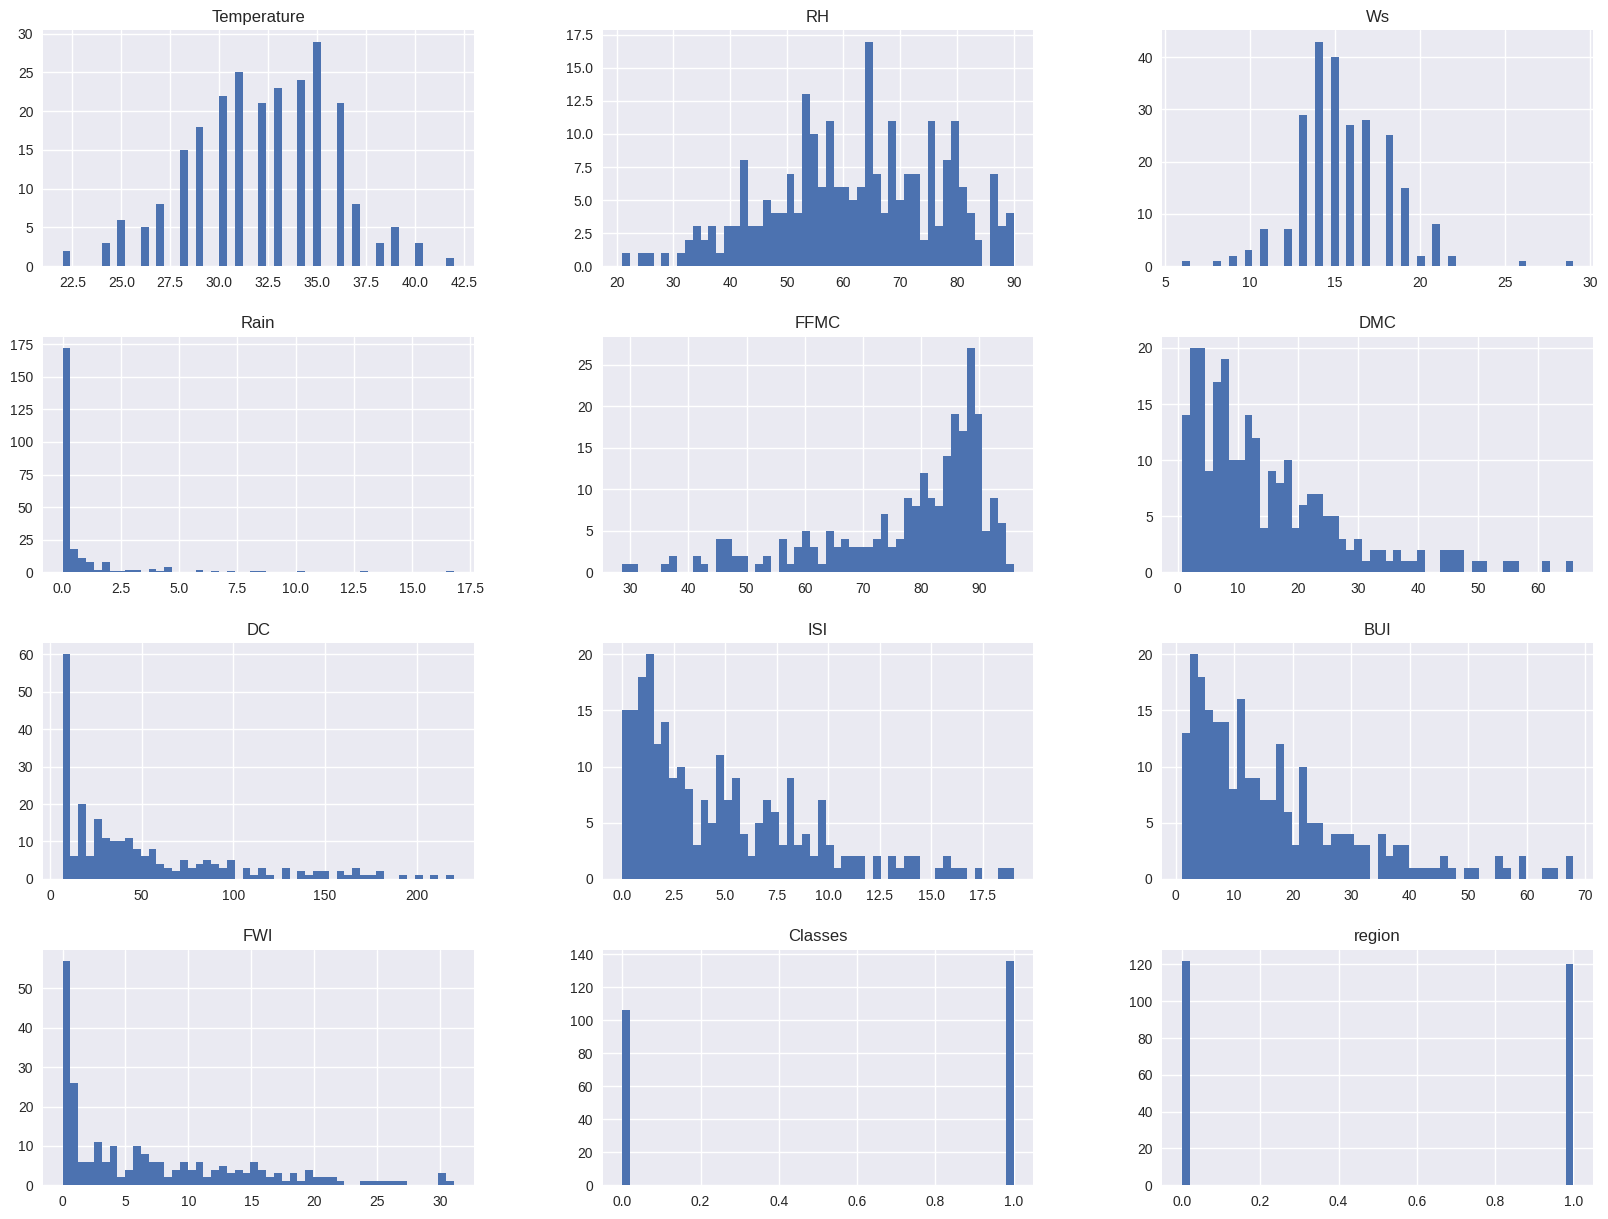

In [32]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [33]:
percentage=df['Classes'].value_counts(normalize=True)*100

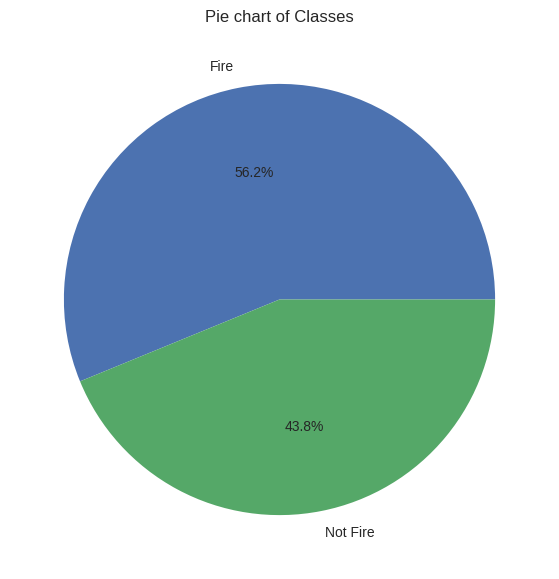

In [34]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie chart of Classes')
plt.show()

/tmp/ipykernel_106/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

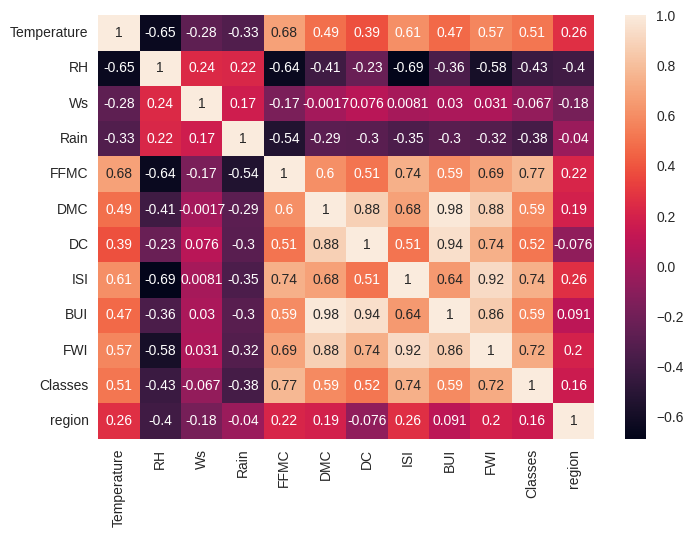

In [35]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

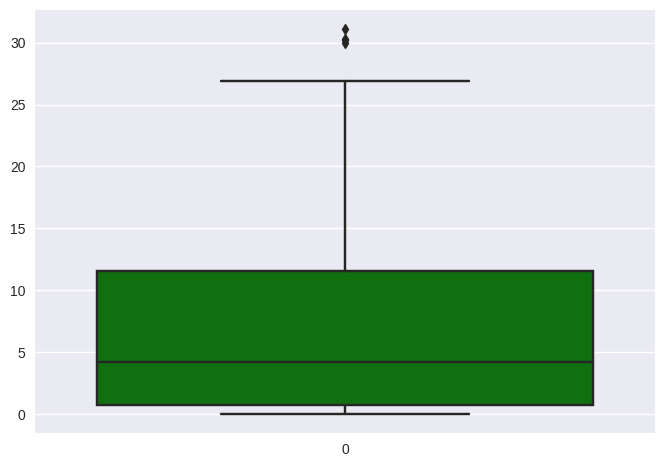

In [36]:
sns.boxplot(df['FWI'],color='green')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

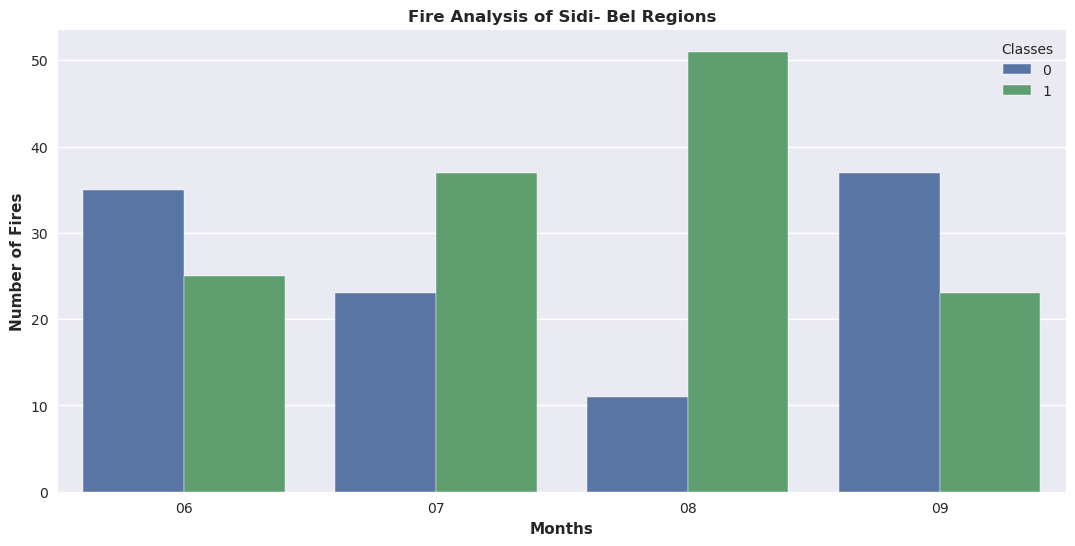

In [37]:
## Monthly Fire Analysis
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

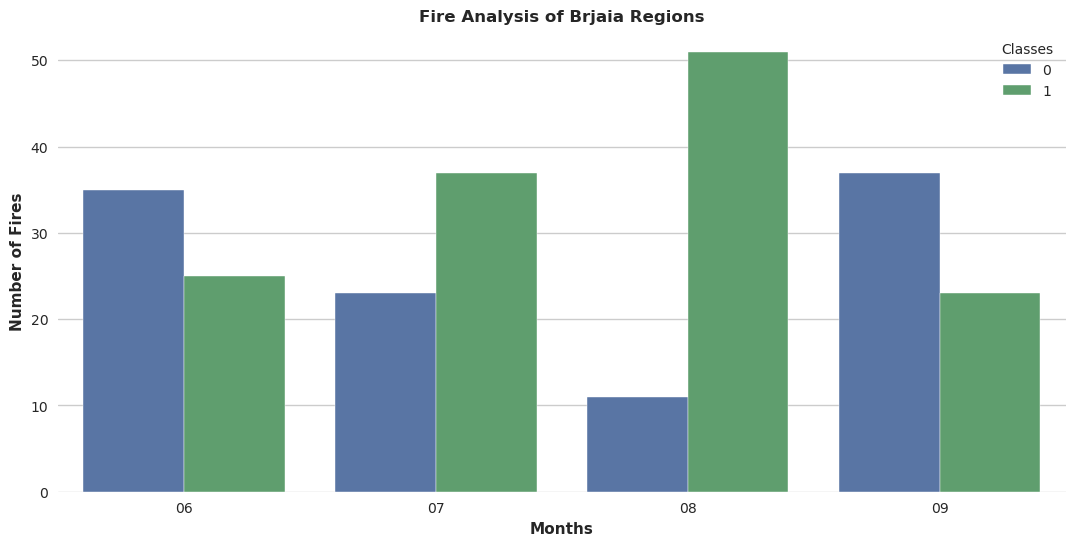

In [38]:
## Monthly Fire Analysis
dftemp=df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [39]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [40]:
df['Classes'].value_counts()

1    136
0    106
Name: Classes, dtype: int64

In [41]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [42]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [44]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.645380,-0.280833,-0.318872,0.693938,0.489839,0.380165,0.626802,0.464135,0.508626,0.245711
RH,-0.645380,1.000000,0.257184,0.230779,-0.632781,-0.410525,-0.241673,-0.701228,-0.360481,-0.433839,-0.370604
Ws,-0.280833,0.257184,1.000000,0.230003,-0.161391,0.004794,0.107368,-0.006268,0.042157,-0.040229,-0.231225
Rain,-0.318872,0.230779,0.230003,1.000000,-0.546540,-0.289536,-0.306431,-0.353492,-0.301455,-0.374078,-0.050991
FFMC,0.693938,-0.632781,-0.161391,-0.546540,1.000000,0.620265,0.533760,0.758535,0.608704,0.784427,0.233159
DMC,0.489839,-0.410525,0.004794,-0.289536,0.620265,1.000000,0.875607,0.690932,0.983599,0.606645,0.199939
DC,0.380165,-0.241673,0.107368,-0.306431,0.533760,0.875607,1.000000,0.545138,0.946348,0.539772,-0.081269
ISI,0.626802,-0.701228,-0.006268,-0.353492,0.758535,0.690932,0.545138,1.000000,0.655919,0.755893,0.281424
BUI,0.464135,-0.360481,0.042157,-0.301455,0.608704,0.983599,0.946348,0.655919,1.000000,0.602444,0.098997
Classes,0.508626,-0.433839,-0.040229,-0.374078,0.784427,0.606645,0.539772,0.755893,0.602444,1.000000,0.173264


<AxesSubplot: >

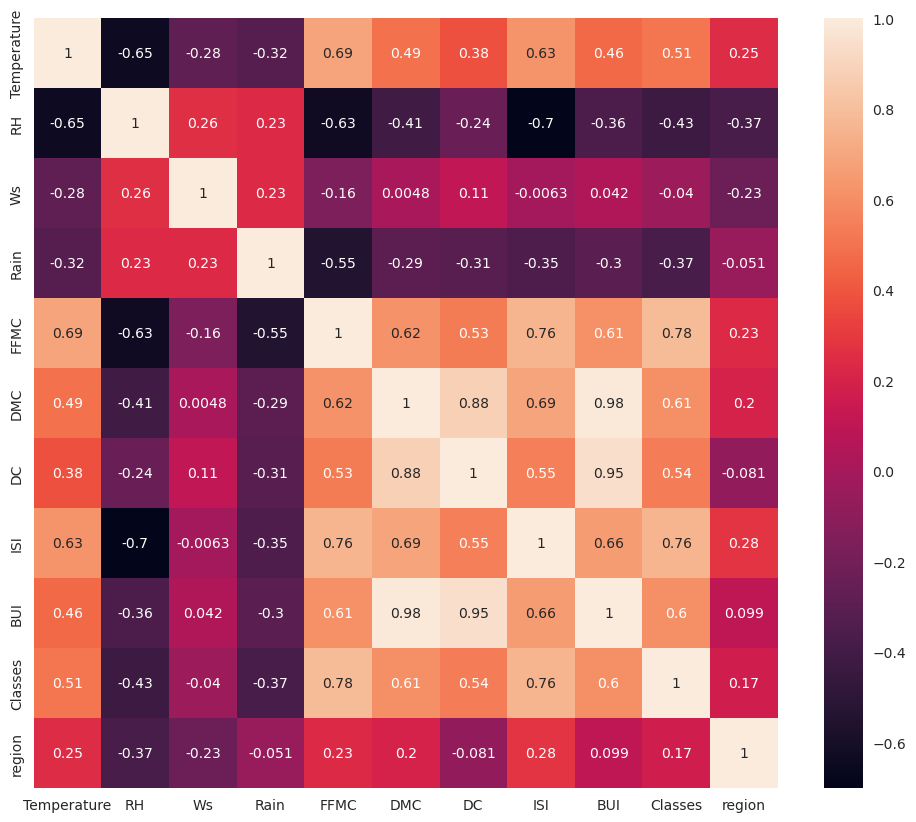

In [45]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [46]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [48]:
corr_features

{'BUI', 'DC'}

In [49]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
X_train_scaled

array([[-0.83322569,  0.76257647,  1.27806135, ..., -0.62192917,
        -1.08661074, -0.98356052],
       [-0.29170379,  0.62719016, -0.53202554, ..., -0.9306632 ,
        -1.08661074,  1.01671425],
       [-0.83322569, -1.47129761, -2.7041298 , ..., -0.47943653,
         0.92029277,  1.01671425],
       ...,
       [-1.91626949,  0.89796278,  0.55402659, ..., -1.07315583,
        -1.08661074, -0.98356052],
       [ 1.06210097, -0.4559003 ,  0.19200922, ...,  0.82674592,
         0.92029277,  1.01671425],
       [-0.56246474,  0.96565593,  2.0020961 , ..., -0.85941689,
        -1.08661074, -0.98356052]])

/tmp/ipykernel_106/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

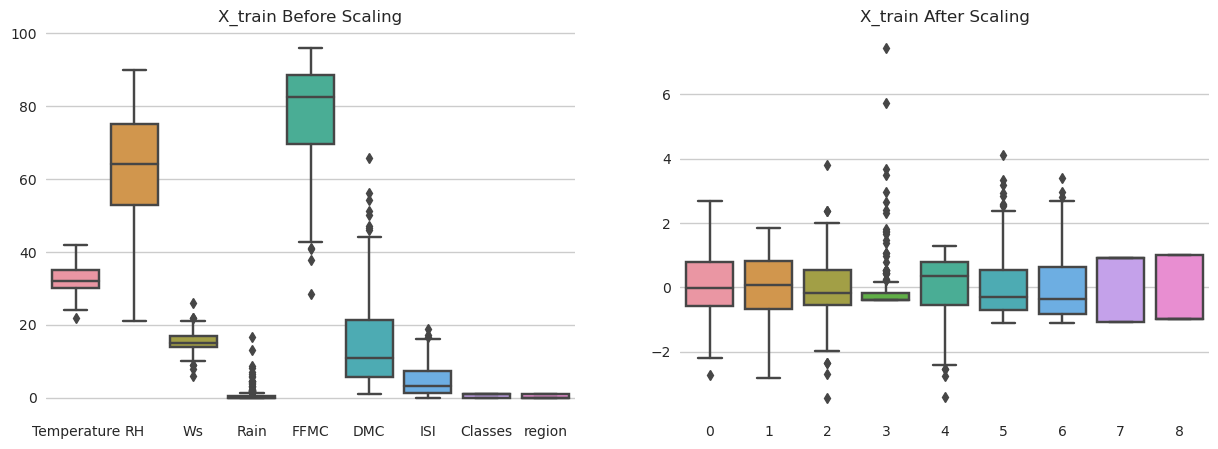

In [52]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.593039784830627
R2 Score 0.9838272318461305


In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1449985876746023
R2 Score 0.95133305686452


In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6164750683641294
R2 Score 0.9830881894125236


In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.9139015163273503
R2 Score 0.8746420307680666


In [57]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))